In [49]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [50]:
# Reading data into a Pandas DataFrame
tsla_data = pd.read_csv('GOOG.csv', 
                        names=['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], 
                        header=0)

# Extracting the close price from the DataFrame
tsla_close = tsla_data['Close'].values


In [51]:
# Normalizing the TSLA stock data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
tsla_close = tsla_close.reshape(-1, 1)
tsla_close = scaler.fit_transform(tsla_close)

In [52]:

# Splitting the TSLA stock data into training and testing sets
train_size = int(len(tsla_close) * 0.8)
test_size = len(tsla_close) - train_size
X_train, Y_train = tsla_close[0:train_size, :], tsla_close[1:train_size+1, :]
X_test, Y_test = tsla_close[train_size:len(tsla_close), :], tsla_close[train_size+1:len(tsla_close), :]

# Transforming the TSLA stock data into 3D arrays
def create_dataset(data, lookback=1):
    X, Y = [], []
    for i in range(len(data) - lookback - 1):
        a = data[i:(i + lookback), 0]
        X.append(a)
        Y.append(data[i + lookback, 0])
    return np.array(X), np.array(Y)

lookback = 1
X_train, Y_train = create_dataset(X_train, lookback)
X_test, Y_test = create_dataset(X_test, lookback)

# Reshaping the arrays into 3D arrays
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))




In [53]:
# Defining the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Training the LSTM model on the training data
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, verbose=2)

# Evaluating the model on the test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


Epoch 1/100
20/20 - 3s - loss: 0.3301 - 3s/epoch - 144ms/step
Epoch 2/100
20/20 - 0s - loss: 0.2160 - 43ms/epoch - 2ms/step
Epoch 3/100
20/20 - 0s - loss: 0.0833 - 44ms/epoch - 2ms/step
Epoch 4/100
20/20 - 0s - loss: 0.0302 - 45ms/epoch - 2ms/step
Epoch 5/100
20/20 - 0s - loss: 0.0239 - 44ms/epoch - 2ms/step
Epoch 6/100
20/20 - 0s - loss: 0.0179 - 44ms/epoch - 2ms/step
Epoch 7/100
20/20 - 0s - loss: 0.0125 - 46ms/epoch - 2ms/step
Epoch 8/100
20/20 - 0s - loss: 0.0078 - 43ms/epoch - 2ms/step
Epoch 9/100
20/20 - 0s - loss: 0.0045 - 44ms/epoch - 2ms/step
Epoch 10/100
20/20 - 0s - loss: 0.0025 - 45ms/epoch - 2ms/step
Epoch 11/100
20/20 - 0s - loss: 0.0015 - 44ms/epoch - 2ms/step
Epoch 12/100
20/20 - 0s - loss: 0.0011 - 44ms/epoch - 2ms/step
Epoch 13/100
20/20 - 0s - loss: 9.7197e-04 - 44ms/epoch - 2ms/step
Epoch 14/100
20/20 - 0s - loss: 9.4161e-04 - 46ms/epoch - 2ms/step
Epoch 15/100
20/20 - 0s - loss: 9.3166e-04 - 48ms/epoch - 2ms/step
Epoch 16/100
20/20 - 0s - loss: 9.1640e-04 - 44ms/ep

In [54]:
# Inverting the normalized data back to the original scale
scaler.fit(tsla_close.reshape(-1, 1))
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform(Y_test.reshape(-1,1))

In [55]:
# Calculating the mean absolute error (MAE) of the training and test sets
train_mae = np.mean(abs(train_predict - Y_train))
test_mae = np.mean(abs(test_predict - Y_test))
print('Training MAE:', train_mae)
print('Testing MAE:', test_mae)

Training MAE: 0.014844177213421926
Testing MAE: 0.02084196143255049


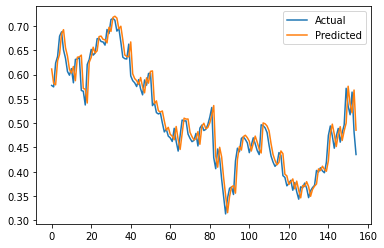

In [56]:
# Plotting the predicted and actual values
plt.plot(Y_test, label = 'Actual')
plt.plot(test_predict, label = 'Predicted')
plt.legend()
plt.show()

In [57]:
# Get the latest close price
latest_close = tsla_close[-1]

# Normalize the latest close price
latest_close = latest_close.reshape(1, -1)
latest_close = scaler.transform(latest_close)

# Reshape the latest close price into a 3D array
latest_close = np.reshape(latest_close, (1, lookback, 1))

# Predict the close price for tomorrow
tomorrow_predict = model.predict(latest_close)

# Invert the normalized prediction back to the original scale
tomorrow_predict = scaler.inverse_transform(tomorrow_predict)

# Print the prediction
print("Predicted close price for tomorrow: ", tomorrow_predict[0][0])


1/1 [==============================] - 0s 19ms/step
Predicted close price for tomorrow:  0.43267867


In [58]:
scaler.fit(tsla_close.reshape(-1, 1))
predicted_price = scaler.inverse_transform(np.array([[0.34591573]]))
print("Predicted close price for tomorrow: ", predicted_price[0][0])


Predicted close price for tomorrow:  0.34591573


In [59]:
# Get the latest actual value
latest_actual = Y_test[-1]
print("Latest actual close price: ", latest_actual)


Latest actual close price:  [0.43553197]


In [60]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 1, 50)             10400     
                                                                 
 lstm_9 (LSTM)               (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________
